In [58]:
import pandas as pd
import re

In [59]:
sessions = pd.read_csv('../data/sessions.csv', parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x))

In [60]:
sessions = sessions[['session_id', 'date', 'url', 'size']]

In [61]:
sessions['size'].str.contains('Kb').sum()

6034

In [77]:
sessions['size_kb'] = sessions['size'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

In [78]:
sessions.dtypes

session_id             int64
date          datetime64[ns]
url                   object
size                  object
size_kb                int64
day                    int64
month                  int64
year                   int64
dtype: object

In [79]:
sessions['day'] = sessions.date.apply(lambda x: x.day)
sessions['month'] = sessions.date.apply(lambda x: x.month)
sessions['year'] = sessions.date.apply(lambda x: x.year)

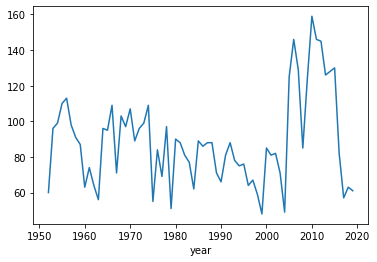

In [80]:
sessions.groupby('year')['session_id'].count().plot()

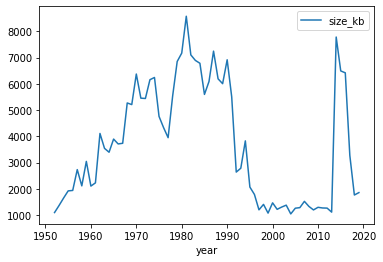

In [83]:
sessions.groupby('year').agg({'size_kb': 'mean'}).plot()